In [1]:
%matplotlib inline

In [2]:
import json
from pathlib import Path

import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf', 'svg')
matplotlib.rcParams['svg.fonttype'] = 'none'

In [45]:
CLUSTERED_FUNCTIONS = ["DeferredClusteredShader::renderGeometryPassObjects",
                       "ClusteredLightManager::computeKeys",
                       "ClusteredLightManager::sortAndCompactKeys",
                       "ClusteredLightManager::clearClustering",
                       "ClusteredLightManager::buildClustering",
                       "ClusteredLightManager::finaliseClustering",
                       "DeferredClusteredShader::loadLightClustering",
                       "DeferredClusteredShader::renderLightPassObjects",
                      ]

CLUSTERED_FUNCTIONS_WITHOUT = ["DeferredClusteredShader::renderGeometryPassObjects",
                       "ClusteredLightManager::computeKeys",
                       "ClusteredLightManager::clearClustering",
                       "ClusteredLightManager::buildClustering",
                       "ClusteredLightManager::finaliseClustering",
                       "DeferredClusteredShader::loadLightClustering",
                       "DeferredClusteredShader::renderLightPassObjects",
                      ]

In [102]:
N_TESTS = 3

CLUSTERED_RES_PATH = Path(r"C:\Users\Monthy\Documents\projects\thesis\thesis-data-suite\data\raw\cs-resolution")
CLUSTERED_FRAMES_PATH = Path(r"C:\Users\Monthy\Documents\projects\thesis\thesis-data-suite\data\raw\cs-frames")

TILED_RES_PATH = Path(r"C:\Users\Monthy\Documents\projects\thesis\thesis-data-suite\data\raw\ts-resolution")
ATTENUATED_PATH = Path(r"C:\Users\Monthy\Documents\projects\thesis\thesis-data-suite\data\raw\forward_deferred")

In [52]:
ANALYSIS_ROOT = Path(r"C:\Users\Monthy\Documents\projects\thesis\thesis-data-suite\data\analysis\clustered")

In [39]:
def json_to_dataframe(json_dic : dict) -> pd.DataFrame:
    '''
    Convert a json data file spit out by nTiled into something just slightly more useful
    '''
    # get all functions tracked from first frame
    frames = json_dic["frames"]
    functions = list(x for x in frames[0]["functions"])
    
    # build empty dictionary which will be loaded with data from frames
    data_raw = { fn : {} for fn in functions }    
    frames_i = {}
    
    for f in frames:
        f_i = int(f["frame"])
        frames_i[f_i] = f_i
        for fn in functions:
            if fn in f["functions"]:
                data_raw[fn][f_i] = float(f["functions"][fn])
            
    data_series = {fn : pd.Series(data_raw[fn], name=fn) for fn in functions }
    data_series["index"] = pd.Series(frames_i, name="index")
    
    dataframe = pd.DataFrame(data_series)
    return dataframe

In [88]:
def average_tests(df_l : list) -> pd.DataFrame:
    frame_mean = pd.concat(df_l)
    by_row_index = frame_mean.groupby(frame_mean.index)
    df_means = by_row_index.mean()
    
    return df_means


def plot_frames_stack(folder_path: Path, with_sortAndCompact = True):
    dfs = []
    
    for i in range(N_TESTS):
        file_path = folder_path / Path("data_{}.json".format(i))
        with open(str(file_path), 'r') as f:
            data_json = json.loads(f.read())        
        dfs.append(json_to_dataframe(data_json))
        
    
    # Plot Data
    # ---------------------------------------------------------------------------------------------------
    df = average_tests(dfs)
  
    if with_sortAndCompact:
        functions = CLUSTERED_FUNCTIONS
    else:
        functions = CLUSTERED_FUNCTIONS_WITHOUT
    
    sum_list = []
    
    for i in range(len(functions)):
        sum_list.append(functions[i])
        df.loc[:, 'sum_{}'.format(i)] = df[sum_list].sum(axis=1)
                
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_color_cycle(["#6c8abd", "#73b584", "#d07175", "B8DBF4", "#ccb974", "#64b5cd","DABDE4", "#8172b2",  ])

    for i in range(len(functions)):
        plt.plot(df["index"], df["sum_{}".format(i)], label=functions[i].split("::")[1]) #"index", "sum_{}".format(i), data=df, ax=ax, label=CLUSTERED_FUNCTIONS[i].split("::")[1])
        if i == 0:
            ax.fill_between(df["index"], df["sum_{}".format(i)], 0, zorder=i)
        else:
            ax.fill_between(df["index"], df["sum_{}".format(i)], df["sum_{}".format(i-1)])

        
        
    ax.set(xlabel='Frame', ylabel='Uitvoeringsijd (ms)')
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

    plt.show()

c:\program files\python3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


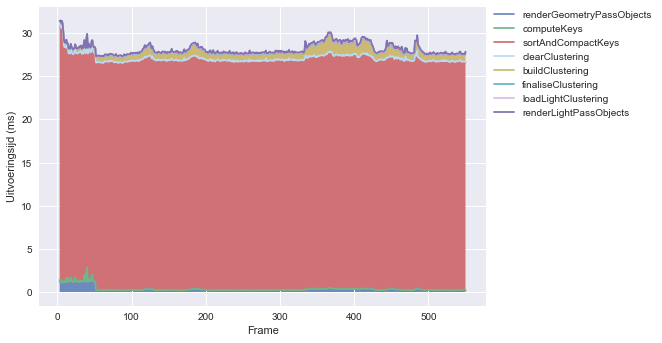

In [96]:
path = CLUSTERED_FRAMES_PATH / Path("deferred/pipers-alley/32")
plot_frames_stack(path)

c:\program files\python3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


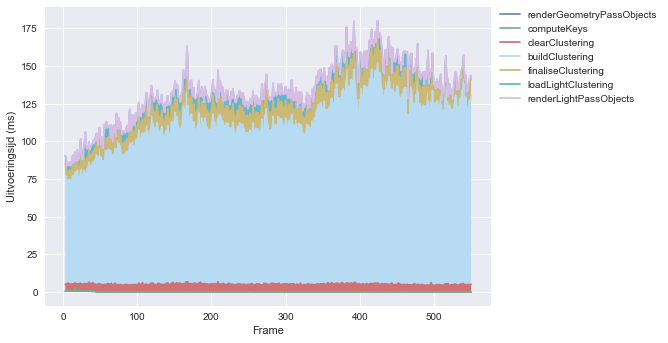

In [90]:
path = CLUSTERED_RES_PATH / Path("deferred/pipers-alley/32/2560")
plot_frames_stack(path, False)

In [98]:
def export_frames_stack(folder_path: Path, scene, res, with_sortAndCompact = True):
    dfs = []
    
    for i in range(N_TESTS):
        file_path = folder_path / Path("data_{}.json".format(i))
        with open(str(file_path), 'r') as f:
            data_json = json.loads(f.read())        
        dfs.append(json_to_dataframe(data_json))
        
    
    # Plot Data
    # ---------------------------------------------------------------------------------------------------
    df = average_tests(dfs)
  
    if with_sortAndCompact:
        functions = CLUSTERED_FUNCTIONS
    else:
        functions = CLUSTERED_FUNCTIONS_WITHOUT
    
    sum_list = []
    
    for i in range(len(functions)):
        sum_list.append(functions[i])
        df.loc[:, 'sum_{}'.format(i)] = df[sum_list].sum(axis=1)
                
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_color_cycle(["#6c8abd", "#73b584", "#d07175", "B8DBF4", "#ccb974", "#64b5cd","DABDE4", "#8172b2",  ])

    for i in range(len(functions)):
        plt.plot(df["index"], df["sum_{}".format(i)], label=functions[i].split("::")[1]) #"index", "sum_{}".format(i), data=df, ax=ax, label=CLUSTERED_FUNCTIONS[i].split("::")[1])
        if i == 0:
            ax.fill_between(df["index"], df["sum_{}".format(i)], 0, zorder=i)
        else:
            ax.fill_between(df["index"], df["sum_{}".format(i)], df["sum_{}".format(i-1)])

    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 25
    
    ax.set(xlabel='Frame', ylabel='Uitvoeringstijd (ms)')    
    
    # Export file
    # -------------------------------------------------------------
    path = ANALYSIS_ROOT / Path("graphs/frames_stacked/")
    
    if not path.exists() or path.is_file():
        path.mkdir(parents=True)
        
    output_path = path / Path("frames_{}_{}.svg".format(scene, res))
    fig.savefig(str(output_path), bbox_inches='tight')
    plt.close(fig)



In [99]:
path = CLUSTERED_RES_PATH / Path("deferred/pipers-alley/32/2560")
export_frames_stack(path, "pipers-alley", 2560)

path = CLUSTERED_RES_PATH / Path("deferred/spaceship-indoor/32/2560")
export_frames_stack(path, "spaceship-indoor", 2560)

path = CLUSTERED_RES_PATH / Path("deferred/ziggurat-city/32/2560")
export_frames_stack(path, "ziggurat-city", 2560)

c:\program files\python3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [100]:
path = CLUSTERED_FRAMES_PATH / Path("deferred/pipers-alley/32")
export_frames_stack(path, "pipers-alley", 320)

path = CLUSTERED_FRAMES_PATH / Path("deferred/spaceship-indoor/32")
export_frames_stack(path, "spaceship-indoor", 320)

path = CLUSTERED_FRAMES_PATH / Path("deferred/ziggurat-city/32")
export_frames_stack(path, "ziggurat-city", 320)

c:\program files\python3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [104]:
def plot_frames(folder_path_clustered: Path, 
                folder_path_tiled: Path,
                folder_path_attenuated: Path,
                scene, 
                res):
    dfs_clustered = []
    dfs_tiled = []
    dfs_attenuated = []
    
    for i in range(N_TESTS):
        file_path = folder_path_clustered / Path("data_{}.json".format(i))
        with open(str(file_path), 'r') as f:
            data_json = json.loads(f.read())        
        dfs_clustered.append(json_to_dataframe(data_json))

        file_path = folder_path_tiled / Path("data_{}.json".format(i))
        with open(str(file_path), 'r') as f:
            data_json = json.loads(f.read())        
        dfs_tiled.append(json_to_dataframe(data_json))
        
        file_path = folder_path_attenuated / Path("data_{}.json".format(i))
        with open(str(file_path), 'r') as f:
            data_json = json.loads(f.read())        
        dfs_attenuated.append(json_to_dataframe(data_json))

        
    # Plot Data
    # ---------------------------------------------------------------------------------------------------
    df_clustered = average_tests(dfs_clustered)
    df_tiled = average_tests(dfs_tiled)
    df_attenuated = average_tests(dfs_attenuated)
                    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    sns.regplot("index", "DeferredAttenuatedShader::renderLightPassObjects", 
                data=df_attenuated, fit_reg=False, 
                ax=ax,
                label="Attenuated",
                scatter_kws={"s": 15})
    sns.regplot("index", "DeferredTiledShader::renderLightPassObjects", 
                data=df_tiled, fit_reg=False, 
                ax=ax,
                label="Tiled",
                scatter_kws={"s": 15})
    sns.regplot("index", "DeferredClusteredShader::renderLightPassObjects", 
                data=df_clustered, fit_reg=False, 
                ax=ax,
                label="Clustered",
                scatter_kws={"s": 15})


    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 25
    
    ax.set(xlabel='Frame', ylabel='Uitvoeringstijd (ms)')    
    
    # Export file
    # -------------------------------------------------------------
    plt.show()
    #path = ANALYSIS_ROOT / Path("graphs/frames_stacked/")
    
    #if not path.exists() or path.is_file():
    #    path.mkdir(parents=True)
        
    #output_path = path / Path("frames_{}_{}.svg".format(scene, res))
    #fig.savefig(str(output_path), bbox_inches='tight')
    plt.close(fig)
 

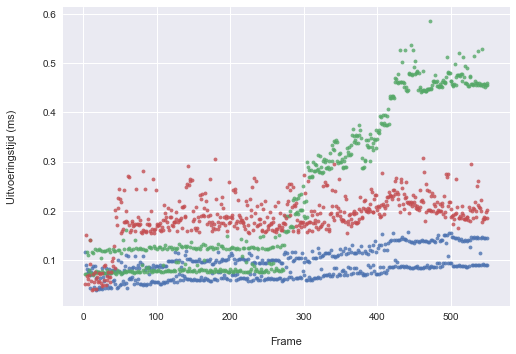

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Monthy\\Documents\\projects\\thesis\\thesis-data-suite\\data\\raw\\forward_deferred\\deferred\\spaceship-indoor\\1044#3x_3y_2z\\2560\\data_0.json'

In [106]:
path_attenuated = ATTENUATED_PATH / Path("deferred/pipers-alley/1044#3x_3y_2z/2560") 
path_tiled = TILED_RES_PATH / Path("deferred/pipers-alley/32/2560")
path_clustered = CLUSTERED_RES_PATH / Path("deferred/pipers-alley/32/2560")
plot_frames(path_clustered, 
              path_tiled,
              path_attenuated,
              "pipers-alley", 
              2560)

path_attenuated = ATTENUATED_PATH / Path("deferred/spaceship-indoor/1044#3x_3y_2z/2560") 
path_tiled = TILED_RES_PATH / Path("deferred/spaceship-indoor/32/2560")
path_clustered = CLUSTERED_RES_PATH / Path("deferred/spaceship-indoor/32/2560")
plot_frames(path_clustered,
              path_tiled,
              path_attenuated, 
              "spaceship-indoor", 
              2560)

path_attenuated = ATTENUATED_PATH / Path("deferred/ziggurat-city/1044#3x_3y_2z/2560") 
path_tiled = TILED_RES_PATH / Path("deferred/ziggurat-city/32/2560")
path_clustered = CLUSTERED_RES_PATH / Path("deferred/ziggurat-city/32/2560")
plot_frames(path_clustered, 
              path_tiled,
              path_attenuated,
              "ziggurat-city", 
              2560)